# Revive it
Checking on air quality in Barcelona so we make it a healthier place.

## Dataset
We're using the official data from the city of Barcelona: https://opendata-ajuntament.barcelona.cat/data/en/dataset/qualitat-aire-detall-bcn
As data up to April 2019 is in a different format, we only use data from April 2019 up to the (currently) most recent data: February 2024.

## Check the data and put it in one document

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing stuff

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

2024-04-10 14:33:22.182009: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 14:33:22.325842: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 14:33:22.938899: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 14:33:24.956127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [33]:
# from revive_it_package.data import detectDelimiter

def detectDelimiter(csv_naam):
    csvFile = f"../raw_data/{csv_naam}"

    with open(csvFile, 'r') as myCsvfile:
        header=myCsvfile.readline()
        if header.find(";")!=-1:
            return ";"
        if header.find(",")!=-1:
            return ","
    #default delimiter (MS Office export)
    return ";"

In [34]:
# Putting data in one excel and saving it for futher use
data = pd.DataFrame()

all_csv = [csv for csv in os.listdir("../raw_data") if csv.endswith(".csv")]

for csv in all_csv:
    print(f"starting {csv}")
    new_df = data

    if detectDelimiter(csv) == ",":
        df = pd.read_csv(f"../raw_data/{csv}")
    else:
        df = pd.read_csv(f"../raw_data/{csv}", delimiter=";")
    data = pd.concat([new_df, df])

data.to_csv("../data/data.csv", index=False)


starting 2022_08_Agost_qualitat_aire_BCN.csv
starting 2023_11_Novembre_qualitat_aire_BCN.csv
starting 2023_12_Desembre_qualitat_aire_BCN.csv
starting 2019_10_Octubre_qualitat_aire_BCN.csv
starting 2023_03_Marc_qualitat_aire_BCN.csv
starting 2019_08_Agost_qualitat_aire_BCN.csv
starting 2023_08_Agost_qualitat_aire_BCN.csv
starting 2023_02_Febrer_qualitat_aire_BCN.csv
starting 2019_06_Juny_qualitat_aire_BCN.csv
starting 2023_10_Octubre_qualitat_aire_BCN.csv
starting 2023_05_Maig_qualitat_aire_BCN.csv
starting 2021_07_Juliol_qualitat_aire_BCN.csv
starting 2021_05_Maig_qualitat_aire_BCN.csv
starting 2021_10_Octubre_qualitat_aire_BCN.csv
starting 2023_04_Abril_qualitat_aire_BCN.csv
starting 2022_11_Novembre_qualitat_aire_BCN.csv
starting 2021_02_Febrer_qualitat_aire_BCN.csv
starting 2023_07_Juliol_qualitat_aire_BCN.csv
starting 2020_02_Febrer_qualitat_aire_BCN.csv
starting 2019_12_Desembre_qualitat_aire_BCN.csv
starting 2021_01_Gener_qualitat_aire_BCN.csv
starting 2021_08_Agost_qualitat_aire

In [3]:
# Uploaded saved excel with all data
df = pd.read_csv("../data/data.csv")
df.head()

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2022,8,1,1.0,...,2.0,V,2.0,V,1.0,V,2.0,V,1.0,V
1,8,Barcelona,19,Barcelona,4,7,2022,8,2,1.0,...,3.0,V,2.0,V,1.0,V,1.0,V,2.0,V
2,8,Barcelona,19,Barcelona,4,7,2022,8,3,1.0,...,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,8,Barcelona,19,Barcelona,4,7,2022,8,4,1.0,...,1.0,V,NaN,N,1.0,V,1.0,V,NaN,N
4,8,Barcelona,19,Barcelona,4,7,2022,8,5,1.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [4]:
# Put column names in lower case
df.columns = [col.lower() for col in df.columns]

# Modify data to timeseries
df.rename(columns={'any' : 'year', 'mes': 'month', 'dia': 'day'}, inplace=True)
df['date'] = pd.to_datetime(df[['year','month','day',]])

# Setting dates as the index
df.set_index(['date'], inplace=True)


In [57]:
df.head()

,codi_provincia,provincia,codi_municipi,municipi,estacio,codi_contaminant,year,month,day,h01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
date,,,,,,,,,,,,,,,,,,,,,
2022-08-01,8,Barcelona,19,Barcelona,4,7,2022,8,1,1.0,...,2.0,V,2.0,V,1.0,V,2.0,V,1.0,V
2022-08-02,8,Barcelona,19,Barcelona,4,7,2022,8,2,1.0,...,3.0,V,2.0,V,1.0,V,1.0,V,2.0,V
2022-08-03,8,Barcelona,19,Barcelona,4,7,2022,8,3,1.0,...,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V
2022-08-04,8,Barcelona,19,Barcelona,4,7,2022,8,4,1.0,...,1.0,V,NaN,N,1.0,V,1.0,V,NaN,N
2022-08-05,8,Barcelona,19,Barcelona,4,7,2022,8,5,1.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [58]:
# Check for null values
df.isnull().sum()

codi_provincia          0
provincia               0
codi_municipi           0
municipi                0
estacio                 0
codi_contaminant        0
year                    0
month                   0
day                     0
h01                  3208
v01                     0
h02                  2819
v02                     0
h03                  2477
v03                     0
h04                  2203
v04                     0
h05                  2206
v05                     0
h06                  2214
v06                     0
h07                  2228
v07                     0
h08                  2279
v08                     0
h09                  2500
v09                     0
h10                  3430
v10                     0
h11                  5178
v11                     0
h12                  5488
v12                     0
h13                  5299
v13                     0
h14                  4701
v14                     0
h15                  4051
v15         

In [5]:
# Choose 1 contaminant (NoX)
nox_df = df[df["codi_contaminant"] == 12]

# Check different stations:
nox_df["estacio"].value_counts()

estacio
4     1775
42    1775
44    1775
50    1775
54    1775
57    1775
43    1555
58    1549
Name: count, dtype: int64

In [6]:
# Choose 1 station
nox_4_df = nox_df[nox_df["estacio"] == 50]
nox_4_df

,codi_provincia,provincia,codi_municipi,municipi,estacio,codi_contaminant,year,month,day,h01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
date,,,,,,,,,,,,,,,,,,,,,
2022-08-01,8,Barcelona,19,Barcelona,50,12,2022,8,1,22.0,...,81.0,V,67.0,V,36.0,V,45.0,V,18.0,V
2022-08-02,8,Barcelona,19,Barcelona,50,12,2022,8,2,15.0,...,72.0,V,49.0,V,48.0,V,25.0,V,21.0,V
2022-08-03,8,Barcelona,19,Barcelona,50,12,2022,8,3,18.0,...,51.0,V,41.0,V,46.0,V,26.0,V,25.0,V
2022-08-04,8,Barcelona,19,Barcelona,50,12,2022,8,4,34.0,...,33.0,V,43.0,V,44.0,V,24.0,V,20.0,V
2022-08-05,8,Barcelona,19,Barcelona,50,12,2022,8,5,16.0,...,34.0,V,29.0,V,22.0,V,20.0,V,26.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-26,8,Barcelona,19,Barcelona,50,12,2019,4,26,20.0,...,14.0,V,15.0,V,17.0,V,18.0,V,27.0,V
2019-04-27,8,Barcelona,19,Barcelona,50,12,2019,4,27,29.0,...,45.0,V,34.0,V,27.0,V,17.0,V,15.0,V
2019-04-28,8,Barcelona,19,Barcelona,50,12,2019,4,28,17.0,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N


In [7]:
# Create mini DataFrame
mini_df = nox_4_df['h18']
mini_df = mini_df.sort_index().to_frame(name="NoX")
mini_df

,NoX
date,
2019-04-02,54.0
2019-04-03,50.0
2019-04-04,15.0
2019-04-05,154.0
2019-04-06,26.0
...,...
2024-02-25,29.0
2024-02-26,21.0
2024-02-27,21.0


In [8]:
# Check if df is Timeseries
mini_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1775 entries, 2019-04-02 to 2024-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NoX     1758 non-null   float64
dtypes: float64(1)
memory usage: 27.7 KB


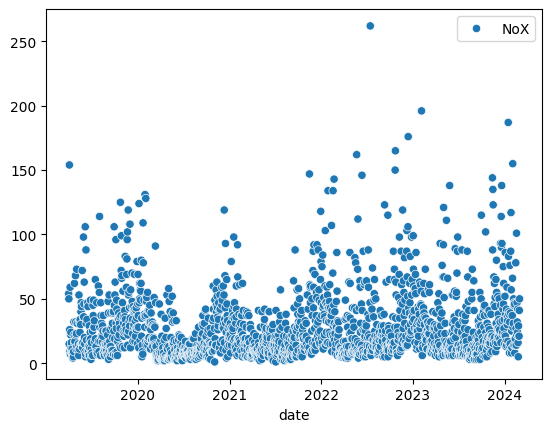

In [9]:
import seaborn as sns

sns.scatterplot(data=mini_df);

## Arima

In [10]:
# Check NaN values: total and view head
print(len(mini_df[mini_df["NoX"].isna()]))
mini_df[mini_df["NoX"].isna()].head(30)

# -> we have 65 NaN values (if everything stays unchanged: NoX, station 50 and H12)

17


,NoX
date,
2019-04-28,NaN
2019-06-13,NaN
2019-07-05,NaN
2019-07-15,NaN
2019-07-16,NaN
2019-07-21,NaN
2019-08-06,NaN
2019-12-06,NaN
2020-03-25,NaN


In [12]:
# How to handle NA values?
## There are no big gaps: the max is 2 days on a row
# -> work with a 'Rolling Statistics Imputation' of 5D

mini_df["NoX"] = mini_df["NoX"].fillna(mini_df["NoX"].rolling(5, min_periods=1).mean())
mini_df[mini_df.isna()].head(30)

/tmp/ipykernel_1499/3327849664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df["NoX"] = mini_df["NoX"].fillna(mini_df["NoX"].rolling(5, min_periods=1).mean())


,NoX
date,
2019-04-03,NaN
2019-04-04,NaN
2019-04-05,NaN
2019-04-06,NaN
2019-04-07,NaN
2019-04-08,NaN
2019-04-09,NaN
2019-04-10,NaN
2019-04-11,NaN


In [13]:
# Check NA values
print(len(mini_df[mini_df["NoX"].isna()]))

# Only first value still NA, hence delete as this won't bring any advantage in keeping
mini_df = mini_df.iloc[1:, :]
print(len(mini_df[mini_df["NoX"].isna()]))

0
0


When trying to decompose the results we get an error message regarding missing values.

As this are not missing the NA values, most likely this means we have missing periods.

We got indeed a list with missing data which didn't correspond with the NA values:
    
    Observacions importants sobre els històrics:
    
    Degut a incidències tècniques hi ha períodes d'interrupció sense dades i que corresponen a:

    * Del 12 juliol'18 a les 17h fins el 23 de juliol'18 a les 15h
    * Del 23 d'agost'18 a les 16h fins el 24 d'agost'18 a les 9h
    * Del 1/2/2019 al 31/3/2019 degut al canvi de font esmentat.
    * El 20/6/2019 entre les 7:40h i les 14:00h.
    * Del 26/7/2019 a les 13:30h fins el 29/7/2019 a les 10:40h.
    * A l'històric del mes d'abril'20 i en el període 15/4 a 30/4 l'estació amb codi: 54 no té informats els valors dels contaminants de codi : 7,8 i 12 degut a una incidència en la detecció d'aquests .
    * A l'històric del mes de novembre'20 es presenten interrupció de dades els següents dies/hores:
      * El 4 de la 1:50h i les 10:50h
      * El 20 de les 19:50h al 21 a les 11:25h
      * El 27 de les 02:10h al 30 a les 10:05h
    * A l'històric del mes de gener'21 es presenten interrupció dels valors de PM10 a l'estació de Palau Reial del dijous 21 a les 16:00h al dimarts 26 a les 13:00h.

I found that strange at first, but most likely the NA values were invalid sensor data while missing data were totally missing.

Let's check that theory:

In [14]:
mini_df

,NoX
date,
2019-04-04,15.0
2019-04-05,154.0
2019-04-06,26.0
2019-04-07,9.0
2019-04-08,59.0
...,...
2024-02-25,29.0
2024-02-26,21.0
2024-02-27,21.0


In [15]:
# Checking the / for missing values
# Please note: this is a quick overview and not all "dates" are dates (f. ex. 30 feb etc)

missing_data = []

df_copy = mini_df.copy()
for year in df_copy.index.year.unique():
    for month in range(1,13):
        for day in range(1, 32):
            if (((df_copy.index.year == year) & (df_copy.index.month == month) & (df_copy.index.day == day)).sum() == 0):
                missing_data.append(f"{day}-{month}-{year}")

missing_data


['1-1-2019',
 '2-1-2019',
 '3-1-2019',
 '4-1-2019',
 '5-1-2019',
 '6-1-2019',
 '7-1-2019',
 '8-1-2019',
 '9-1-2019',
 '10-1-2019',
 '11-1-2019',
 '12-1-2019',
 '13-1-2019',
 '14-1-2019',
 '15-1-2019',
 '16-1-2019',
 '17-1-2019',
 '18-1-2019',
 '19-1-2019',
 '20-1-2019',
 '21-1-2019',
 '22-1-2019',
 '23-1-2019',
 '24-1-2019',
 '25-1-2019',
 '26-1-2019',
 '27-1-2019',
 '28-1-2019',
 '29-1-2019',
 '30-1-2019',
 '31-1-2019',
 '1-2-2019',
 '2-2-2019',
 '3-2-2019',
 '4-2-2019',
 '5-2-2019',
 '6-2-2019',
 '7-2-2019',
 '8-2-2019',
 '9-2-2019',
 '10-2-2019',
 '11-2-2019',
 '12-2-2019',
 '13-2-2019',
 '14-2-2019',
 '15-2-2019',
 '16-2-2019',
 '17-2-2019',
 '18-2-2019',
 '19-2-2019',
 '20-2-2019',
 '21-2-2019',
 '22-2-2019',
 '23-2-2019',
 '24-2-2019',
 '25-2-2019',
 '26-2-2019',
 '27-2-2019',
 '28-2-2019',
 '29-2-2019',
 '30-2-2019',
 '31-2-2019',
 '1-3-2019',
 '2-3-2019',
 '3-3-2019',
 '4-3-2019',
 '5-3-2019',
 '6-3-2019',
 '7-3-2019',
 '8-3-2019',
 '9-3-2019',
 '10-3-2019',
 '11-3-2019',
 '12-

In [80]:
# Let's remove the most obvious mistakes: before and after the data starts

trimmed_data = missing_data[95:146]

# And now we'll delete the non-dates

no_data = ['30-2','31-2', '31-4', '31-6', '31-9', '31-11', '29-2-2021', '29-2-2022', '29-2-2023', '29-2-2024']
to_del = [s for s in trimmed_data if any(xs in s for xs in no_data)]
len(trimmed_data) - len(to_del)

dates_missing_in_df = list(set(trimmed_data) - set(to_del))

# modify list into datetime

import datetime as dt
dates_list = [dt.datetime.strptime(date, "%d-%m-%Y").date() for date in dates_missing_in_df]
sorted(dates_list)

# Although the format is a bit messed up, we can see that we have maximum 3 missing values in a row.


[datetime.date(2019, 4, 3),
 datetime.date(2019, 5, 7),
 datetime.date(2019, 5, 8),
 datetime.date(2019, 5, 9),
 datetime.date(2019, 7, 26),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 28),
 datetime.date(2019, 7, 31),
 datetime.date(2019, 9, 21),
 datetime.date(2019, 12, 7),
 datetime.date(2019, 12, 8),
 datetime.date(2020, 1, 25),
 datetime.date(2020, 1, 26),
 datetime.date(2020, 8, 7),
 datetime.date(2020, 8, 8),
 datetime.date(2020, 8, 9),
 datetime.date(2020, 11, 20),
 datetime.date(2020, 11, 28),
 datetime.date(2020, 11, 29),
 datetime.date(2020, 11, 30),
 datetime.date(2021, 11, 8)]

## Ignore below here for the moment

In [ ]:
# TODO

# Add or ignore missing values
# If adding: dates need to be added on correct place in order to fill will rolling

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(mini_df["NoX"].asfreq('d'), model='additive')
result_add.plot();

ValueError: This function does not handle missing values

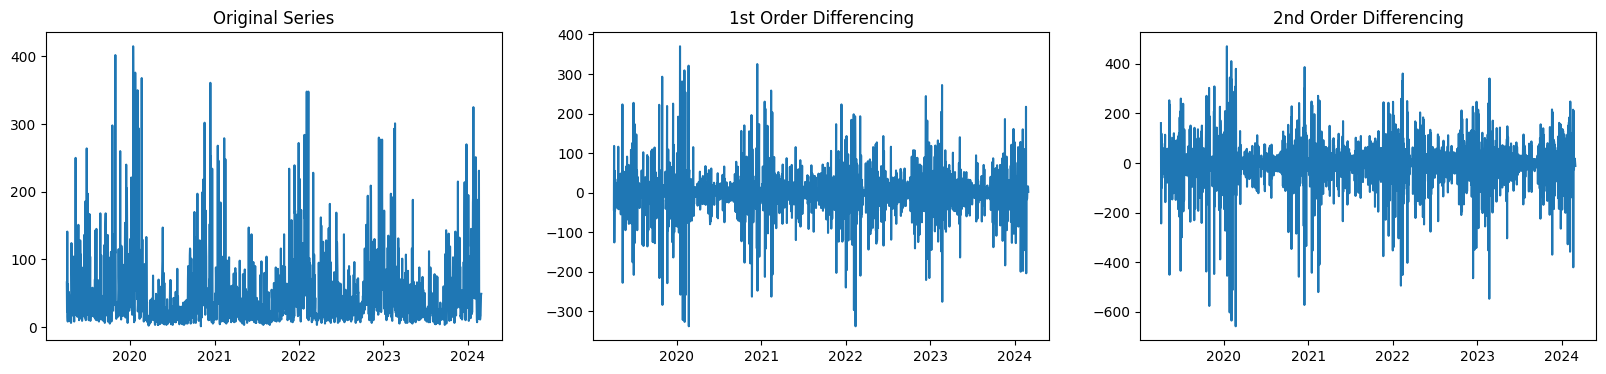

In [81]:
zero_diff = mini_df
first_order_diff = mini_df.diff(1)
second_order_diff = mini_df.diff(1).diff(1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing');

In [34]:
# Let's remove seasons
mini_df['deseasonalized'] = mini_df.values/result_mul.seasonal

plt.figure(figsize=(15,4)); plt.subplot(1,2,1); plt.plot(mini_df.deseasonalized);
plt.title('Drug Sales Deseasonalized', fontsize=16);

# Also remove exponential trend
mini_df['linearized'] = np.log(mini_df['deseasonalized'])

plt.subplot(1,2,2); plt.plot(mini_df['linearized'])
plt.title('Drug Sales Linearized', fontsize=16);

NameError: name 'result_mul' is not defined